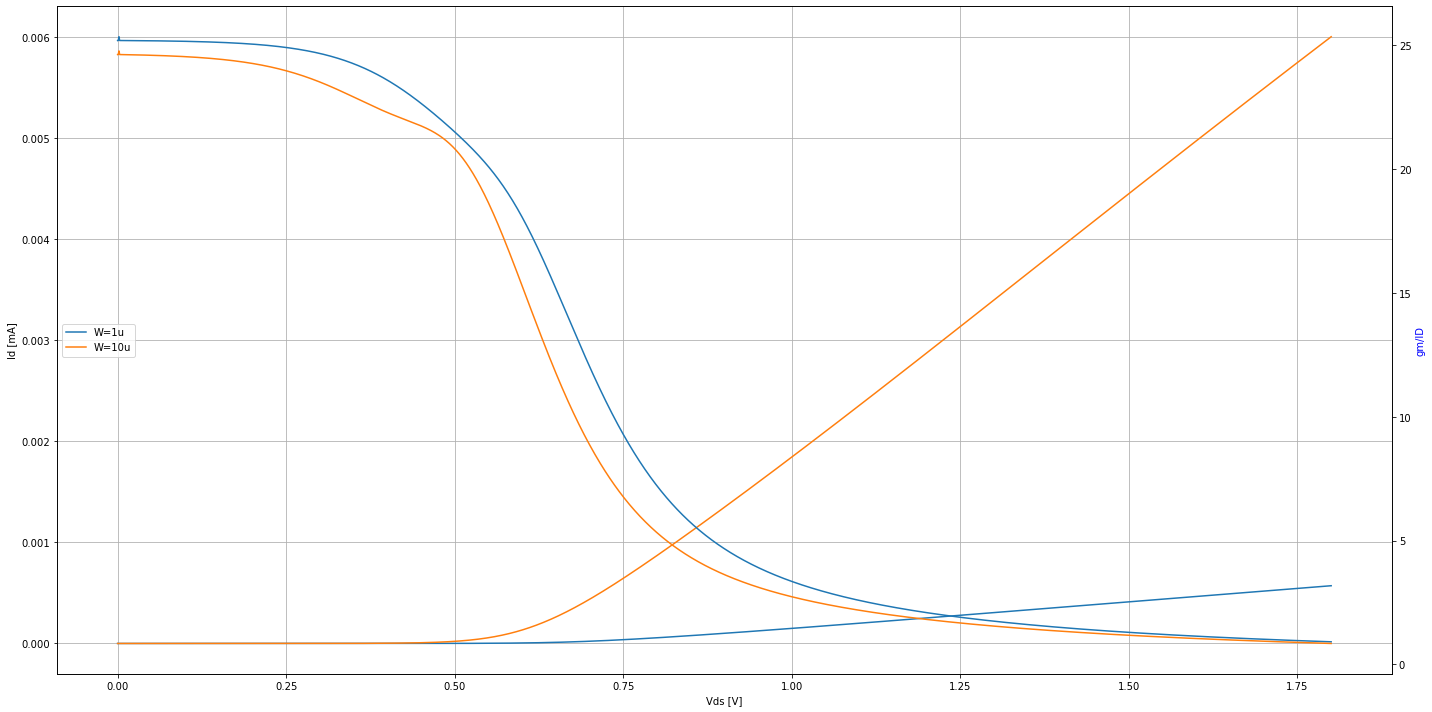

In [87]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

figure, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()


Ws = ['1','10']

for dim in Ws:
    
    filename = "output-" + dim + ".csv"

    spice_str = """ 
    **.subckt test_nmos G1v8 D1v8 B
    *.ipin G1v8
    *.ipin D1v8
    *.ipin B

    Vds D1v8 0 1.8
    Vgs G1v8 0 0.8

    XM1 D1v8 G1v8 S 0 sky130_fd_pr__nfet_01v8_lvt L=0.15 W="""+dim+"""  nf=1 ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
    + pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
    + sa=0 sb=0 sd=0 mult=1 m=1 

    Vss S 0 0V

    **** begin user architecture code

    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_01v8/sky130_fd_pr__nfet_01v8__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_01v8_lvt/sky130_fd_pr__nfet_01v8_lvt__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_01v8/sky130_fd_pr__pfet_01v8__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_03v3_nvt/sky130_fd_pr__nfet_03v3_nvt__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_05v0_nvt/sky130_fd_pr__nfet_05v0_nvt__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/esd_nfet_01v8/sky130_fd_pr__esd_nfet_01v8__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_01v8_lvt/sky130_fd_pr__pfet_01v8_lvt__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_01v8_hvt/sky130_fd_pr__pfet_01v8_hvt__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/esd_pfet_g5v0d10v5/sky130_fd_pr__esd_pfet_g5v0d10v5__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_g5v0d10v5/sky130_fd_pr__pfet_g5v0d10v5__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_g5v0d16v0/sky130_fd_pr__pfet_g5v0d16v0__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_g5v0d10v5/sky130_fd_pr__nfet_g5v0d10v5__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_g5v0d16v0/sky130_fd_pr__nfet_g5v0d16v0__tt_discrete.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/esd_nfet_g5v0d10v5/sky130_fd_pr__esd_nfet_g5v0d10v5__tt.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/models/corners/tt/nonfet.spice
    * Mismatch parameters
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_01v8/sky130_fd_pr__nfet_01v8__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_01v8/sky130_fd_pr__pfet_01v8__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_01v8_lvt/sky130_fd_pr__nfet_01v8_lvt__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_01v8_lvt/sky130_fd_pr__pfet_01v8_lvt__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_01v8_hvt/sky130_fd_pr__pfet_01v8_hvt__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_g5v0d10v5/sky130_fd_pr__nfet_g5v0d10v5__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/pfet_g5v0d10v5/sky130_fd_pr__pfet_g5v0d10v5__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_05v0_nvt/sky130_fd_pr__nfet_05v0_nvt__mismatch.corner.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_03v3_nvt/sky130_fd_pr__nfet_03v3_nvt__mismatch.corner.spice
    * Resistor~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/Capacitor
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/models/r+c/res_typical__cap_typical.spice
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/models/r+c/res_typical__cap_typical__lin.spice
    * Special cells
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/models/corners/tt/specialized_cells.spice
    * All models
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/models/all.spice
    * Corner
    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/models/corners/tt/rf.spice

    * this experimental option enables mos model bin
    * selection based on W/NF instead of W
    .option wnflag=1
    .option savecurrents
    .control
    save all
    dc vgs 0 1.8 0.001 
    *print Vss#branch > output.dat
    *write test_nmos.raw
    wrdata """+filename+""" Vss#branch
    exit
    .endc

    .include ~/skywater-pdk/libraries/sky130_fd_pr_ngspice/latest/cells/nfet_20v0/sky130_fd_pr__nfet_20v0__tt_discrete.corner.spice

    **** end user architecture code
    **.ends
    ** flattened .save nodes
    *.save I(Vss)
    .end
    """

    spiceNameFile = "testLVT.spice"

    with open(spiceNameFile, "w") as text_file:
        text_file.write(spice_str)

    ngspiceCmd = "ngspice " + spiceNameFile

    sai = subprocess.call(ngspiceCmd, shell=True)
    df = pd.read_csv(filename,sep=' ', names=['Vds','No', 'Ids', 'Nne1']).reset_index()
    ax.plot(df['Vds'], df['Ids'], label='W='+dim+'u')
    
    gm   = np.gradient(df['Ids'])/np.gradient(df['Vds'])
    gmID = gm/df['Ids']
    ax2.plot(df['Vds'], gmID, label='W='+dim+'u')



ax.grid()
ax.set_xlabel('Vds [V]')
ax2.set_ylabel('gm/ID', color='b')
ax.set_ylabel('Id [mA]')
ax.legend(loc=6)

plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

In [69]:
gm   = np.gradient(df['Ids'])/np.gradient(df['Vds'])
gmID = gm/df['Ids']

In [70]:
gmID

0       24.631961
1       24.641349
2       24.779026
3       24.633091
4       24.632629
          ...    
1796     0.850802
1797     0.849967
1798     0.849133
1799     0.848302
1800     0.847528
Name: Ids, Length: 1801, dtype: float64

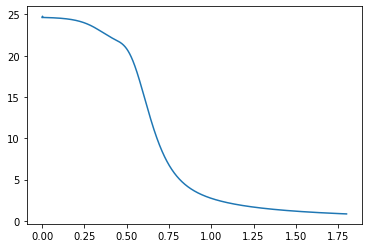

In [71]:
plt.plot(df['Vds'], gmID)

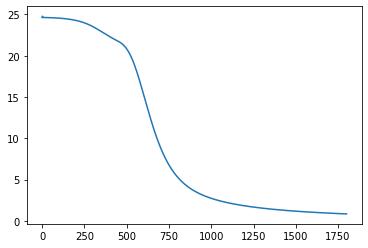

In [72]:
plt.plot(gmID)

In [21]:
len(df['Ids'])

181

,Vds,No,Ids,Nne1
NaN,0.00,NaN,1.236367e-33,NaN
NaN,0.01,NaN,2.224024e-06,NaN
NaN,0.02,NaN,4.313785e-06,NaN
NaN,0.03,NaN,6.271980e-06,NaN
NaN,0.04,NaN,8.101294e-06,NaN


<Figure size 432x288 with 0 Axes>